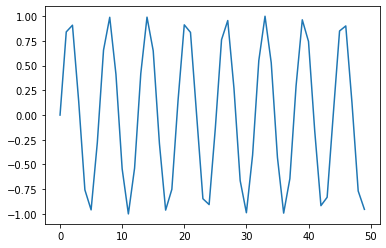

In [70]:
import math
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
%matplotlib inline
sin_wave = np.array([math.sin(x) for x in np.arange(200)])

plt.plot(sin_wave[:50])

In [71]:
X = []
Y = []

seq_len = 50
num_records = len(sin_wave) - seq_len

for i in range(num_records - 50):
    X.append(sin_wave[i:i+seq_len])
    Y.append(sin_wave[i+seq_len])
    
X = np.array(X)
X = np.expand_dims(X, axis=2)

Y = np.array(Y)
Y = np.expand_dims(Y, axis=1)

X_val = []
Y_val = []

for i in range(num_records - 50, num_records):
    X_val.append(sin_wave[i:i+seq_len])
    Y_val.append(sin_wave[i+seq_len])
    
X_val = np.array(X_val)
X_val = np.expand_dims(X_val, axis=2)

Y_val = np.array(Y_val)
Y_val = np.expand_dims(Y_val, axis=1)

In [72]:
X = np.reshape(X, (X.shape[0], seq_len, 1))
X_val = np.reshape(X_val, (X_val.shape[0], seq_len, 1))
# Y = np.reshape(Y, (Y.shape[0], seq_len, 1))
n_units = 128

encoder_inputs = keras.Input(shape=(seq_len, 1))
encoder = keras.layers.LSTM(n_units, return_sequences=False, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)

encoder_states = [state_h, state_c]

decoder_inputs = keras.Input(shape=(40, 1))
decoder_lstm =  keras.layers.LSTM(n_units, return_sequences=True, return_state=True)

decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = keras.layers.Dense(40, activation='linear')
decoder_outputs = decoder_dense(decoder_outputs)

model = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)
print(model.summary())

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 50, 1)]      0           []                               
                                                                                                  
 input_14 (InputLayer)          [(None, 40, 1)]      0           []                               
                                                                                                  
 lstm_12 (LSTM)                 [(None, 128),        66560       ['input_13[0][0]']               
                                 (None, 128),                                                     
                                 (None, 128)]                                                     
                                                                                            

In [73]:
model.compile(optimizer='adam', loss='mse')

decoder_inputs = np.zeros(Y.shape)

my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=5)]

model.fit([X, decoder_inputs], Y,
          epochs=25, verbose=2)

Epoch 1/25
4/4 - 4s - loss: 0.4988 - 4s/epoch - 1s/step
Epoch 2/25
4/4 - 0s - loss: 0.4987 - 166ms/epoch - 42ms/step
Epoch 3/25
4/4 - 0s - loss: 0.4986 - 193ms/epoch - 48ms/step
Epoch 4/25
4/4 - 0s - loss: 0.4986 - 183ms/epoch - 46ms/step
Epoch 5/25
4/4 - 0s - loss: 0.4982 - 192ms/epoch - 48ms/step
Epoch 6/25
4/4 - 0s - loss: 0.4983 - 229ms/epoch - 57ms/step
Epoch 7/25
4/4 - 0s - loss: 0.4983 - 169ms/epoch - 42ms/step
Epoch 8/25
4/4 - 0s - loss: 0.4981 - 187ms/epoch - 47ms/step
Epoch 9/25
4/4 - 0s - loss: 0.4980 - 184ms/epoch - 46ms/step
Epoch 10/25
4/4 - 0s - loss: 0.4984 - 174ms/epoch - 43ms/step
Epoch 11/25
4/4 - 0s - loss: 0.4976 - 219ms/epoch - 55ms/step
Epoch 12/25
4/4 - 0s - loss: 0.4979 - 206ms/epoch - 52ms/step
Epoch 13/25
4/4 - 0s - loss: 0.4983 - 301ms/epoch - 75ms/step
Epoch 14/25
4/4 - 0s - loss: 0.4978 - 206ms/epoch - 52ms/step
Epoch 15/25
4/4 - 0s - loss: 0.4992 - 237ms/epoch - 59ms/step
Epoch 16/25
4/4 - 0s - loss: 0.4986 - 207ms/epoch - 52ms/step
Epoch 17/25
4/4 - 0s -

In [74]:
decoder_inputs = np.zeros(Y_val.shape)
y_pred = model.predict([X_val, decoder_inputs])

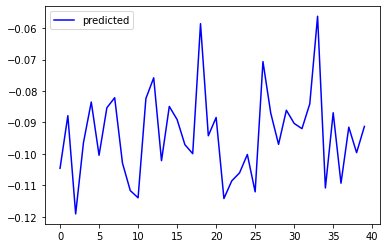

In [75]:

plt.plot(y_pred[0][0], 'b', label = 'predicted')
plt.legend()
